1) Этап импорт всех необходимых библиотек

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

2) Этап вывода изначальных данных

In [72]:
df = pd.read_csv("dataframe.csv")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ANT Development,developer,https://www.cian.ru/sale/flat/303519398/,Москва,sale,flat,11,13,5,265.6,...,Чистовая,-1,-1,74951346248,3 м,Дорогомилово,NaN,3к1,Парк Победы,Виктори Парк Резиденсез ЖК
1,ID 18174647,realtor,https://www.cian.ru/sale/flat/301450189/,Москва,sale,flat,26,31,5,246.7,...,-1,"140,9 м²",28 м²,79166462390,"3,1 м",Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера
2,Monumental Group,real_estate_agent,https://www.cian.ru/sale/flat/306835123/,Москва,sale,flat,4,8,5,117.0,...,-1,-1,10 м²,79672086536,"3,2 м",Пресненский,Большая Садовая,3С1,Маяковская,NaN
3,Главстрой,developer,https://www.cian.ru/sale/flat/296921235/,Москва,sale,flat,24,24,5,172.5,...,Без отделки,"104,6 м²","10,5 м²",74951379308,"3,2 м",Филевский парк,Береговой проезд,2,Фили,Береговой-2
4,Рента,real_estate_agent,https://www.cian.ru/sale/flat/307983948/,Москва,sale,flat,3,9,5,234.8,...,-1,140 м²,23 м²,79663231016,-1,Тверской,Краснопролетарская,7,Новослободская,Ласточкино гнездо


3) Этап 
Все калонки нам не нужны мы убираем лишние не влияющие на цену калонки

In [73]:
columns = list(df.columns)
print(f"До:{columns}")
df = df.drop(['author', 'author_type', 'deal_type', 'url','accommodation_type', 'phone','house_number' ], axis=1)
columns = list(df.columns)
print(f"После:{columns}")

До:['author', 'author_type', 'url', 'location', 'deal_type', 'accommodation_type', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'object_type', 'have_loggia', 'parking_type', 'house_material_type', 'heating_type', 'finish_type', 'living_meters', 'kitchen_meters', 'phone', 'ceiling_height', 'district', 'street', 'house_number', 'underground', 'residential_complex']
После:['location', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'object_type', 'have_loggia', 'parking_type', 'house_material_type', 'heating_type', 'finish_type', 'living_meters', 'kitchen_meters', 'ceiling_height', 'district', 'street', 'underground', 'residential_complex']


4) Этап
Проверка наличия данных также анализ и очистка



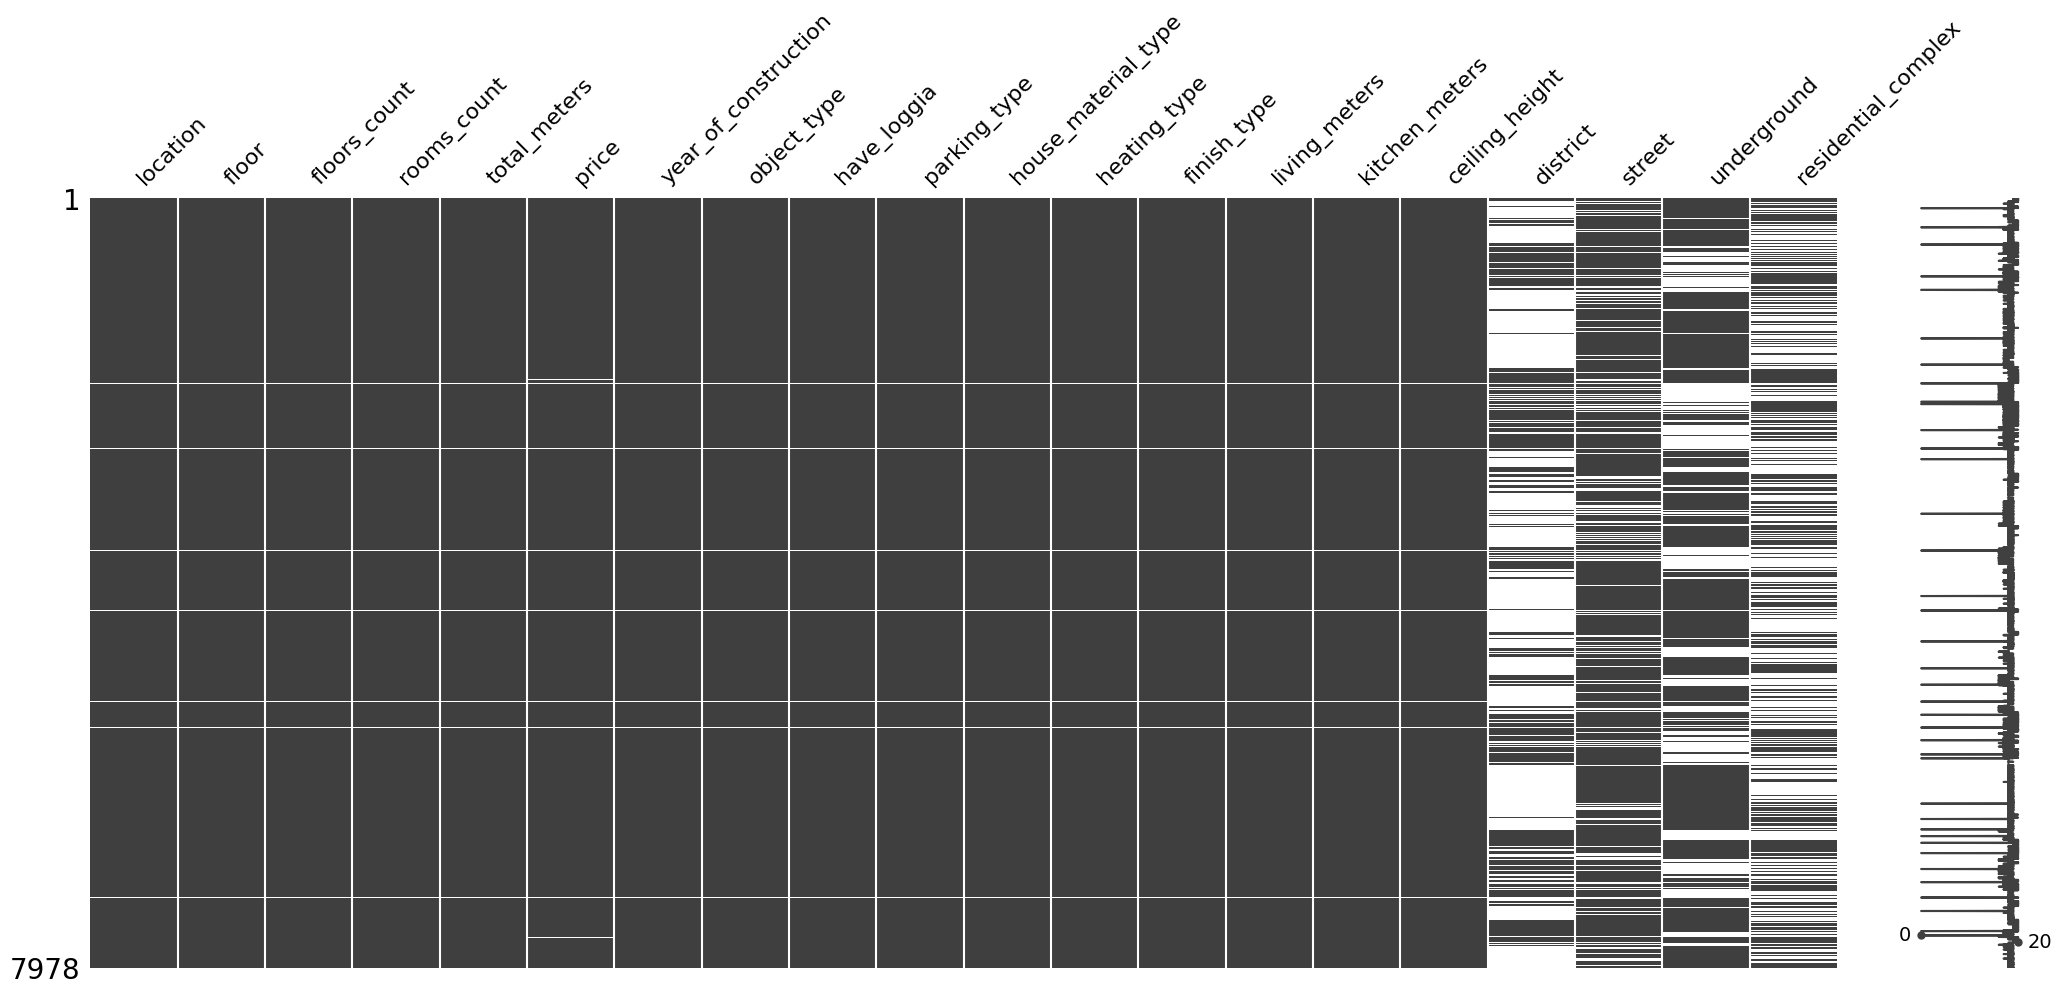

<Figure size 1500x900 with 0 Axes>

In [74]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [75]:
df_cleaned = df.dropna(thresh=3)

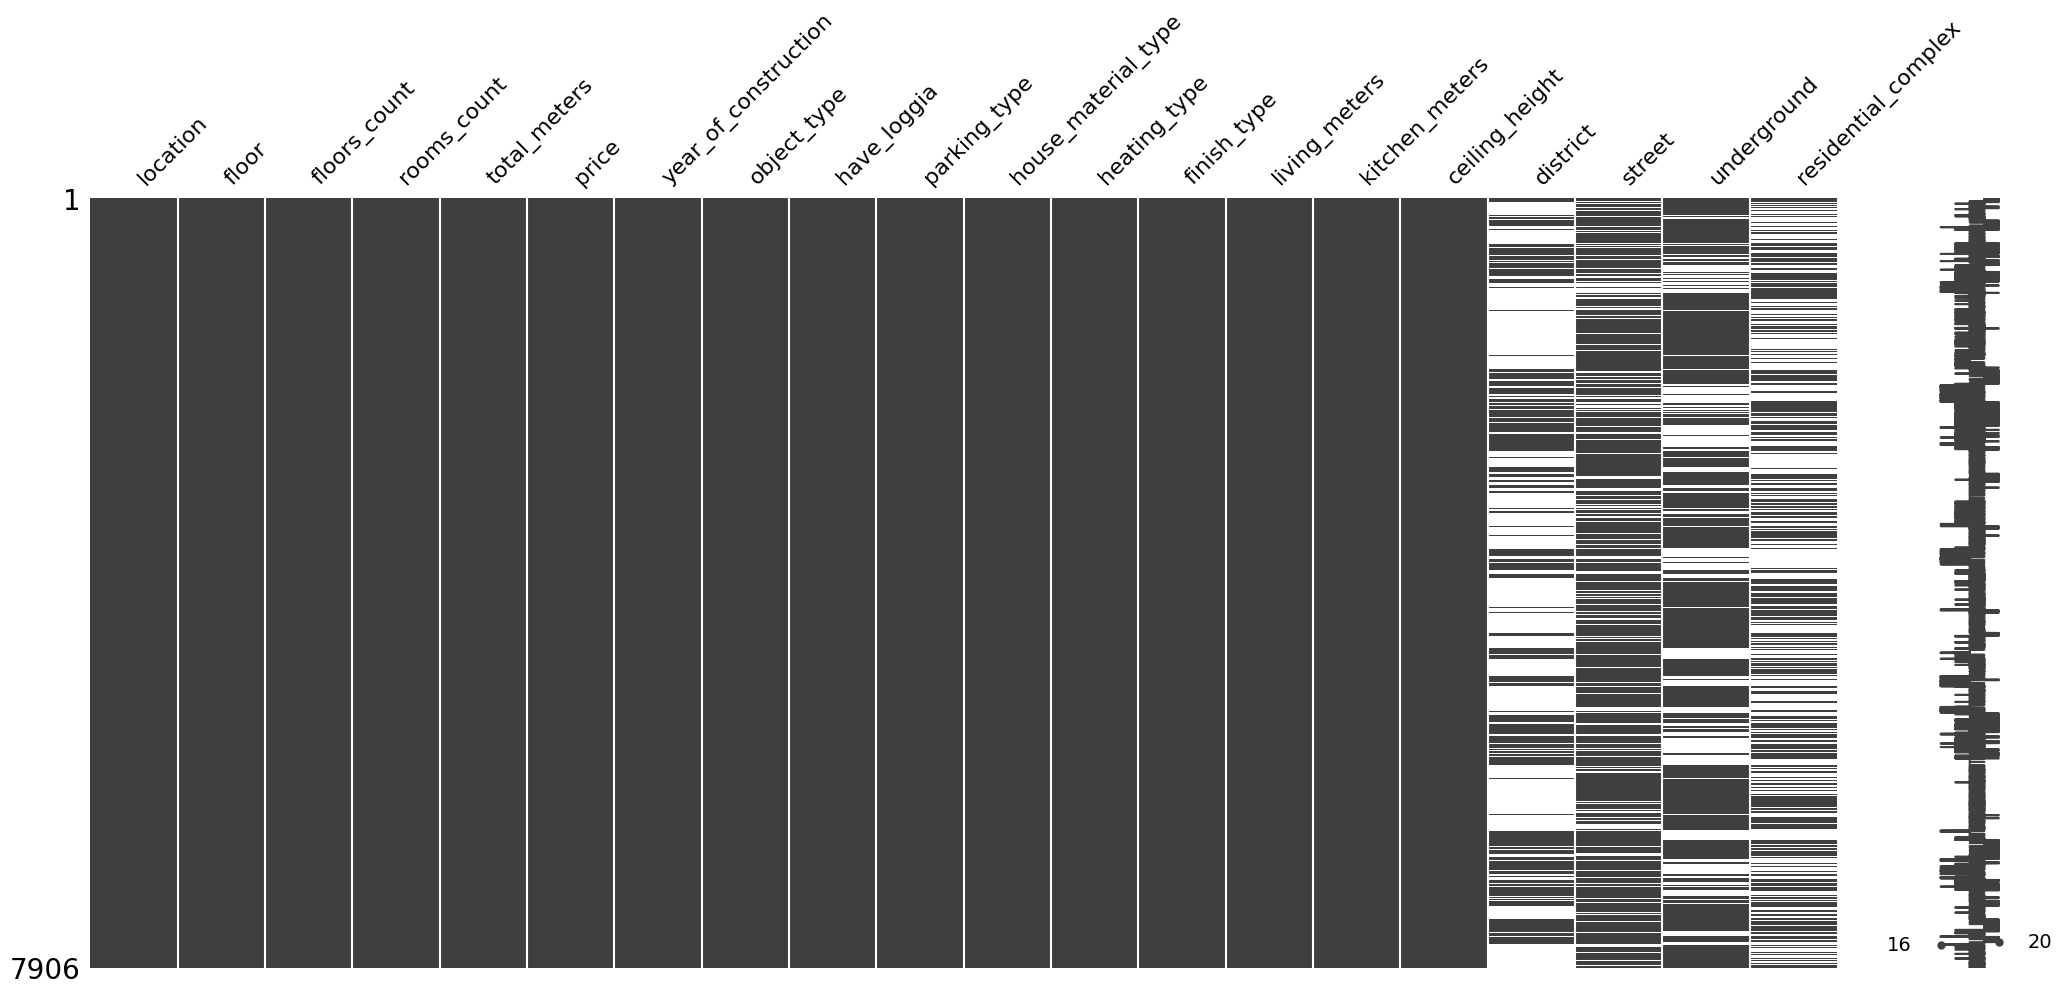

<Figure size 1500x900 with 0 Axes>

In [76]:
msno.matrix(df_cleaned)
plt.figure(figsize = (15,9))
plt.show()